In [2]:
%cd /mnt/raid0_24TB/isaiah/code/NestedGraphs/

/mnt/raid0_24TB/isaiah/code/NestedGraphs


In [15]:
import glob
import torch 
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [12]:
MAL = [201,402,660]

b_embs = glob.glob('inputs/benign/emb*')
m_embs = ['inputs/mal/emb%d.pkl'%i for i in MAL]

bs = []
for b in b_embs:
    with open(b,'rb') as f:
        bs.append(pickle.load(f))

ms = []
for m in m_embs:
    with open(m,'rb') as f:
        ms.append(pickle.load(f))

b_x = torch.cat([b for b in bs])
m_x = torch.cat([m for m in ms])

print(b_x.size())


torch.Size([77567, 512])


In [11]:
from graph_utils import propogate_labels

colors = []
for m in MAL:
    with open('inputs/mal/graph%d.pkl'%m, 'rb') as f:
        g = pickle.load(f)
    with open('inputs/mal/nodes%d.pkl'%m, 'rb') as f:
        nodes = pickle.load(f)

    colors.append(propogate_labels(g,nodes))

colors = torch.cat(colors).clamp(0,1)

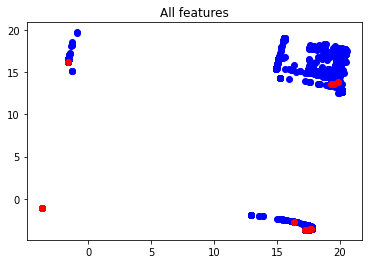

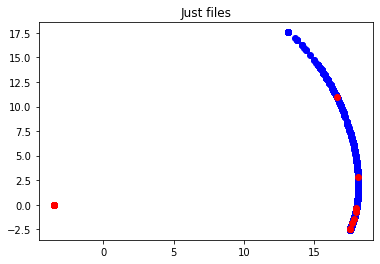

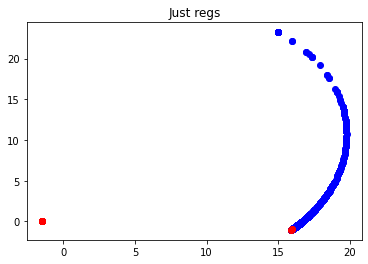

/mnt/raid0_24TB/isaiah/miniconda/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/raid0_24TB/isaiah/miniconda/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
def plot_dots(b_x, m_x, title):
    pca = PCA(n_components=2)
    bx = pca.fit_transform(b_x)
    x = pca.transform(m_x)

    plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

def plot_dots_tsne(b_x, m_x, title):
    pca = TSNE(n_components=2)
    bx = pca.fit_transform(b_x)
    x = pca.transform(m_x)

    plt.scatter(bx[:,0], bx[:,1], color='blue')
    plt.scatter(x[colors==0,0], x[colors==0,1], color='blue')
    plt.scatter(x[colors==1,0], x[colors==1,1], color='red')
    plt.title(title)
    plt.show()

plot_dots(b_x, m_x, 'All features')
plot_dots(b_x[:,:256], m_x[:,:256], 'Just files')
plot_dots(b_x[:,256:], m_x[:,256:], 'Just regs')

plot_dots_tsne(b_x, m_x, 'All features')
plot_dots_tsne(b_x[:,:256], m_x[:,:256], 'Just files')
plot_dots_tsne(b_x[:,256:], m_x[:,256:], 'Just regs')